In [2]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importando bibliotecas e arquivo csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.data_table import DataTable
DataTable.max_columns = 120

tv_0 = pd.read_csv("/content/drive/MyDrive/2022-2A-T05/Grupo 3/datasets/CSV/tv_0_ukn.csv", encoding="UTF-8")


#Definindo os sets de treinamento


In [4]:
from sklearn.model_selection import train_test_split

# Dividindo x e y
x = tv_0[['Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NAO CONSTA', 'Categoria_NOVELA', 'Categoria_OUTROS',
       'Categoria_POLITICO', 'Categoria_PREMIACAO', 'Categoria_REALITY SHOW',
       'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM', 'Categoria_RURAL',
       'Categoria_SERIES', 'Categoria_SHOW', 'Categoria_SORTEIO',
       'Categoria_TELE VENDAS', 'Mês','Hora Início', 'Dia da Semana_1','Dia da Semana_2','Dia da Semana_3',
       'Dia da Semana_4','Dia da Semana_5','Dia da Semana_6','Dia da Semana_7', 'Dia do Mês']]
y = tv_0[['Total Domicílios | Rat%']]


# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1) # qualquer valor como semente do pseudo-random


# 4.4.2 Random Forest Regressor

Nesta primeira etapa, iremos treinar o método random forest regressor 

In [5]:
# Importando bibliotecas e treinando o modelo 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics

regressor = RandomForestRegressor(n_estimators=289, random_state=0)
regressor.fit (x_train, y_train)
y_pred_regressor = regressor.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




> Avaliando a acurácia do modelo 



In [6]:
metrics.r2_score(y_test, y_pred_regressor)

0.9760959640818353

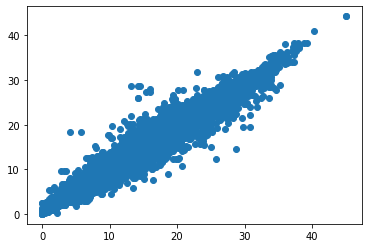

In [7]:
#Distribuição das previsões 

plt.scatter(y_test, y_pred_regressor)

(array([3.000e+00, 8.000e+00, 8.800e+01, 7.090e+02, 3.542e+04, 7.381e+03,
        1.350e+02, 2.200e+01, 5.000e+00, 5.000e+00]),
 array([-14.11708824, -11.16292616,  -8.20876408,  -5.254602  ,
         -2.30043992,   0.65372215,   3.60788423,   6.56204631,
          9.51620839,  12.47037046,  15.42453254]),
 <a list of 10 Patch objects>)

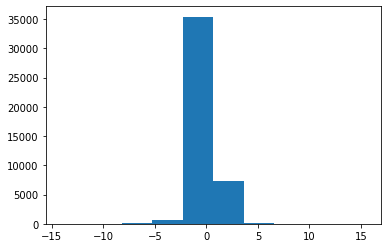

In [8]:
#Calculando os erros do modelo e gerando um histograma dos erros
y_normalizado  = y_test.values.flatten()
errors = (y_pred_regressor - y_normalizado)
plt.hist(errors)

In [9]:
#Desvio padrão dos erros do random forest generator 
errors.std()

1.008094457567484

# 4.4.3 KNN Regressor


In [10]:
from sklearn.neighbors import KNeighborsRegressor

#Instanciar e fazer o fit das variaveis com o modelo 
knn_model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)

#Calculando o score
score_knn = knn_model.score(x_test, y_test)


In [11]:
#Calculando a predição 

y_pred_knn = knn_model.predict(x_test)


Avaliando a acurácia do modelo 

In [12]:
from sklearn import metrics

metrics.r2_score(y_test, y_pred_knn)

0.9746902506950349

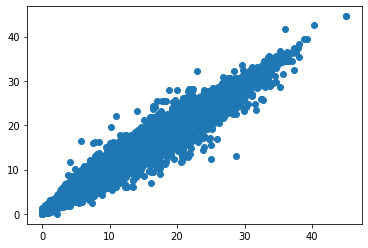

In [13]:
#Distribuição das previsões 

plt.scatter(y_test, y_pred_knn)

# 4.4.4 Regressão linear múltipla 

In [14]:
#Importando as bibliotecas e definindo parâmetros 
from sklearn import linear_model
import statsmodels.api as sm

#Treinando 

regr = linear_model.LinearRegression()
regr.fit(x, y)



LinearRegression()

In [15]:
#Adicionando a constante
x = sm.add_constant(x) 
 
#Realizando a predição  
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
#Sumário dos resultados da regressão linear múltipla
# with statsmodels
print_model = model.summary()
print(print_model) 

                               OLS Regression Results                              
Dep. Variable:     Total Domicílios | Rat%   R-squared:                       0.418
Model:                                 OLS   Adj. R-squared:                  0.418
Method:                      Least Squares   F-statistic:                     4248.
Date:                     Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                             19:03:10   Log-Likelihood:            -6.6146e+05
No. Observations:                   218880   AIC:                         1.323e+06
Df Residuals:                       218842   BIC:                         1.323e+06
Df Model:                               37                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

#Comparando predições com valores originais 

Nesta etapa, iremos comparar o resultado da predição de audiência total com o resultado da vida real.

Devido aos valores de r^2 gerados a partir de cada modelo, resolvemos testar com o Random Forest Regressor, visto que o mesmo possui um r^2 maior. 


### Testando com o Random Forest Regressor (4.4.2)


In [17]:
#Escolhendo uma linha aleatoria do modelo de teste
testPredition = x_test.iloc[['1092']].values.flatten()


#Guardando esse números em uma variável 
testPredition


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 18.])

In [18]:
#Testando o modelo com a linha selecionada acima
predition_RFR = regressor.predict([testPredition])



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [19]:
#Comparando o valor da predição com o valor real do RAT
tv_0['Total Domicílios | Rat%'].iloc[[1092]]

1092    5.35
Name: Total Domicílios | Rat%, dtype: float64

In [20]:
predition_RFR = regressor.predict([testPredition])

print(predition_RFR)

[10.47753576]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


### Testando com o KNN (4.4.3)

In [21]:
#Escolhendo uma linha aleatoria do modelo de teste
testPredition = x_test.iloc[[1092]].values.flatten()

#Guardando esse números em uma variável 
testPredition

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 18.])

In [22]:
#Testando o modelo com a linha selecionada acima
predition_knn = knn_model.predict([testPredition])

print(predition_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


[[10.876]]


In [23]:
#Comparando o valor da predição com o valor real do RAT
tv_0.iloc[[1092]]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Data,Hora Início,Emissora,Mês,Dia do Mês,Total Domicílios | Rat%,AB | Rat%,...,Categoria_SHOW,Categoria_SORTEIO,Categoria_TELE VENDAS,Dia da Semana_1,Dia da Semana_2,Dia da Semana_3,Dia da Semana_4,Dia da Semana_5,Dia da Semana_6,Dia da Semana_7
1092,1092,1092,1092,2020-06-04,25.0,tv_0,6,4,5.35,2.1,...,0,0,0,0,0,0,1,0,0,0


## Como notado nos testes acima, o Random Forest têm uma melhor acurácia. 